# RNN 의사 코드 (실행 X)

In [ ]:
state_t = 0 # 초기 상태

for input_t in input_sequence: # 각 시점에 해당하는 입력을 반복합니다.
    output_t = activation_func(input_t, state_t) # 입력과 은닉상태를 활성화 함수에 통과시킵니다.
    state_t = output_t # 출력값은 다음 시점을 위한 은닉 상태가 됩니다.

## cos 함수를 이용하여 데이터 만들기

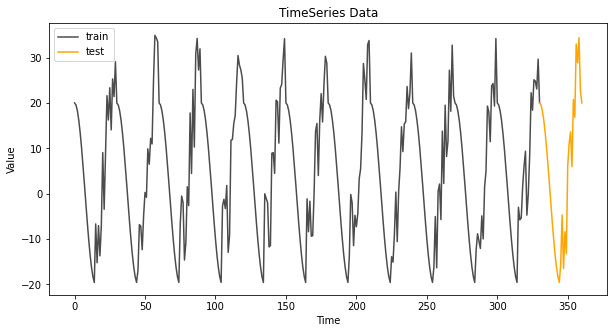

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5, 
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))


plt.figure(figsize = (10, 5))
plt.title('TimeSeries Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30 * 11 + 1), time_series[:30 * 11 + 1], color = 'black', alpha = 0.7, label = 'train') # 학습용 데이터
plt.plot(np.arange(30 * 11, 30 * 12 + 1), time_series[30 * 11:], color = 'orange', label = 'test') # 테스트용 데이터
plt.legend()

## 전처리 과정 수행하기

In [3]:
def make_sequence(time_series, n):
    x_train, y_train = list(), list()
    
    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break
            
    return np.array(x_train), np.array(y_train)

n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', patial_x_train.shape, patial_y_train.shape) 
print('test:',x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


## 데이터 형태 확인하기

In [4]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)

for i in range(1, 4):
    print(a[i],'|', b[i])

[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


## SimpleRNN을 사용하여 모델 구성하기

In [5]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

# SimpleRNN 층을 첫 번째 층으로 사용하는 경우,
# 반드시 input_shape를 명시해주어야 합니다.
model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1)))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


## 모델 학습시키기

In [6]:
model.fit(x_train, y_train, epochs = 200, batch_size = 12)

Epoch 1/200
30/30 [==============================] - 0s 2ms/step - loss: 228.2592
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 185.1777
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 152.8988
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 125.5729
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 109.9890
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 100.6126
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 93.5175
Epoch 8/200
30/30 [==============================] - 0s 3ms/step - loss: 87.7165
Epoch 9/200
30/30 [==============================] - 0s 3ms/step - loss: 82.6434
Epoch 10/200
30/30 [==============================] - 0s 2ms/step - loss: 78.1737
Epoch 11/200
30/30 [==============================] - 0s 2ms/step - loss: 74.6616
Epoch 12/200
30/30 [==============================] - 0s 3ms/step - loss: 71.3033
Epoch 13/200
30/30 

30/30 [==============================] - 0s 2ms/step - loss: 15.4776
Epoch 101/200
30/30 [==============================] - 0s 2ms/step - loss: 14.5813
Epoch 102/200
30/30 [==============================] - 0s 2ms/step - loss: 13.8538
Epoch 103/200
30/30 [==============================] - 0s 2ms/step - loss: 13.5902
Epoch 104/200
30/30 [==============================] - 0s 2ms/step - loss: 13.5728
Epoch 105/200
30/30 [==============================] - 0s 2ms/step - loss: 13.2590
Epoch 106/200
30/30 [==============================] - 0s 2ms/step - loss: 13.2557
Epoch 107/200
30/30 [==============================] - 0s 2ms/step - loss: 12.9089
Epoch 108/200
30/30 [==============================] - 0s 2ms/step - loss: 12.6903
Epoch 109/200
30/30 [==============================] - 0s 2ms/step - loss: 12.5217
Epoch 110/200
30/30 [==============================] - 0s 2ms/step - loss: 12.5075
Epoch 111/200
30/30 [==============================] - 0s 2ms/step - loss: 12.9308
Epoch 112/200
30/3

30/30 [==============================] - 0s 3ms/step - loss: 5.9488
Epoch 200/200
30/30 [==============================] - 0s 3ms/step - loss: 5.9167


## 예측 결과 그려보기

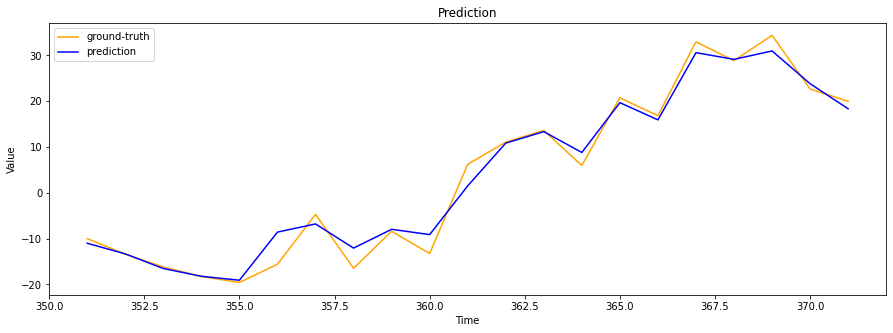

In [7]:
pred = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time'); plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='ground-truth')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()

## IMDB 데이터셋 사용하기

In [ ]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32))
# 새로운 인자 3개가 사용되었습니다.
# return_sequences, dropout, recurrent_dropout
model.add(SimpleRNN(32, return_sequences = True, dropout = 0.15, recurrent_dropout = 0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

# model.summary()
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 15, 
                    validation_split = 0.2)

Epoch 1/15
625/625 [==============================] - 134s 215ms/step - loss: 0.6956 - acc: 0.5257 - val_loss: 0.6790 - val_acc: 0.5262
Epoch 2/15
625/625 [==============================] - 187s 300ms/step - loss: 0.6363 - acc: 0.6270 - val_loss: 0.5136 - val_acc: 0.7722
Epoch 3/15
267/625 [===========>..................] - ETA: 2:06 - loss: 0.5997 - acc: 0.6898

## SimpleRNN 층의 출력값 변화 확인하기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = 10000, output_dim = 32))
# 전체 상태 시퀀스를 반환하거나,
# 마지막 시점의 상태 시퀀스만 반환합니다.
# 주석을 바꿔가면서 출력값 변화를 확인해보세요!
model.add(SimpleRNN(32, return_sequences = True))
# model.add(SimpleRNN(32, return_sequences = False))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


## 학습 과정 그리기

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()